In [15]:
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np

In [16]:
#read data and create a dataframe
df = pd.read_csv('fbref_data.txt')

df

,Rk,Squad,Comp,# Pl,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,1,Alavés,es La Liga,32,613,370,295,269,49,194,...,2820,1032,576,120,0,456,406,1019,1085,8
1,2,Amiens,fr Ligue 1,27,474,320,221,209,44,178,...,2436,989,456,106,3,350,306,780,815,9
2,3,Angers,fr Ligue 1,26,502,320,230,209,63,172,...,2535,999,421,59,1,362,254,756,690,8
3,4,Arsenal,eng Premier League,29,601,373,325,199,77,203,...,2663,1222,614,153,2,461,334,935,978,14
4,5,Aston Villa,eng Premier League,28,606,388,338,195,73,191,...,2487,1222,725,213,4,512,431,1037,983,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Watford,eng Premier League,26,683,429,354,244,85,238,...,2948,1492,622,155,5,467,405,1088,1098,12
94,95,Werder Bremen,de Bundesliga,30,635,396,315,237,83,226,...,2540,1210,580,131,1,449,431,1066,970,10
95,96,West Ham,eng Premier League,29,720,470,400,253,67,230,...,2787,1243,634,127,1,507,422,1142,928,11
96,97,Wolfsburg,de Bundesliga,26,654,402,316,260,78,243,...,2861,1530,590,96,2,494,382,1036,896,12


In [17]:
#check na values
df.isna().sum()

Rk           0
Squad        0
Comp         0
# Pl         0
Tkl          0
TklW         0
Def 3rd      0
Mid 3rd      0
Att 3rd      0
Tkl.1        0
Att          0
Tkl%         0
Past         0
Press        0
Succ         0
%            0
Def 3rd.1    0
Mid 3rd.1    0
Att 3rd.1    0
Blocks       0
Sh           0
ShSv         0
Pass         0
Int          0
Tkl+Int      0
Clr          0
Err          0
dtype: int64

In [18]:
#show all columns name
df.columns

Index(['Rk', 'Squad', 'Comp', '# Pl', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd',
       'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ', '%',
       'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv', 'Pass',
       'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [19]:
#show a list of squads in the dataframe
df['Squad'].unique()

array(['Alavés', 'Amiens', 'Angers', 'Arsenal', 'Aston Villa', 'Atalanta',
       'Athletic Club', 'Atlético Madrid', 'Augsburg', 'Barcelona',
       'Bayern Munich', 'Betis', 'Bologna', 'Bordeaux', 'Bournemouth',
       'Brescia', 'Brest', 'Brighton', 'Burnley', 'Cagliari',
       'Celta Vigo', 'Chelsea', 'Crystal Palace', 'Dijon', 'Dortmund',
       'Düsseldorf', 'Eibar', 'Eint Frankfurt', 'Espanyol', 'Everton',
       'Fiorentina', 'Freiburg', 'Genoa', 'Getafe', 'Granada',
       'Hellas Verona', 'Hertha BSC', 'Hoffenheim', 'Inter', 'Juventus',
       'Köln', 'Lazio', 'Lecce', 'Leganés', 'Leicester City', 'Levante',
       'Leverkusen', 'Lille', 'Liverpool', 'Lyon', "M'gladbach",
       'Mainz 05', 'Mallorca', 'Manchester City', 'Manchester Utd',
       'Marseille', 'Metz', 'Milan', 'Monaco', 'Montpellier', 'Nantes',
       'Napoli', 'Newcastle Utd', 'Nice', 'Nîmes', 'Norwich City',
       'Osasuna', 'Paderborn 07', 'Paris S-G', 'Parma', 'RB Leipzig',
       'Real Madrid', 'Real Soc

In [20]:
#new dataframe with champions league squads and their pressures in different zones
squads_l = ['Real Madrid','Atlético Madrid','Atalanta','Barcelona','Bayern Munich','Chelsea','Juventus','Manchester City','Napoli','Paris S-G','RB Leipzig','Lyon']

df_champ = df[df['Squad'].isin(squads_l)][['Squad','Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1']]

#calculate the percentage applied in each third of the pitch
df_champ['Total'] = df_champ.sum(axis=1)
df_champ['z_1'] = round((df_champ['Def 3rd.1'] / df_champ['Total']) * 100,1) 
df_champ['z_2'] = round((df_champ['Mid 3rd.1'] / df_champ['Total']) * 100,1)
df_champ['z_3'] = round((df_champ['Att 3rd.1'] / df_champ['Total']) * 100,1)

df_champ

,Squad,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Total,z_1,z_2,z_3
5,Atalanta,1676,2941,1365,5982,28.0,49.2,22.8
7,Atlético Madrid,1616,2385,1110,5111,31.6,46.7,21.7
9,Barcelona,1268,2305,1270,4843,26.2,47.6,26.2
10,Bayern Munich,1119,2169,1624,4912,22.8,44.2,33.1
21,Chelsea,1806,2839,1566,6211,29.1,45.7,25.2
39,Juventus,1403,2339,1470,5212,26.9,44.9,28.2
49,Lyon,1433,1859,975,4267,33.6,43.6,22.8
53,Manchester City,1185,2157,1661,5003,23.7,43.1,33.2
61,Napoli,1551,2432,1607,5590,27.7,43.5,28.7
68,Paris S-G,1064,1826,1164,4054,26.2,45.0,28.7


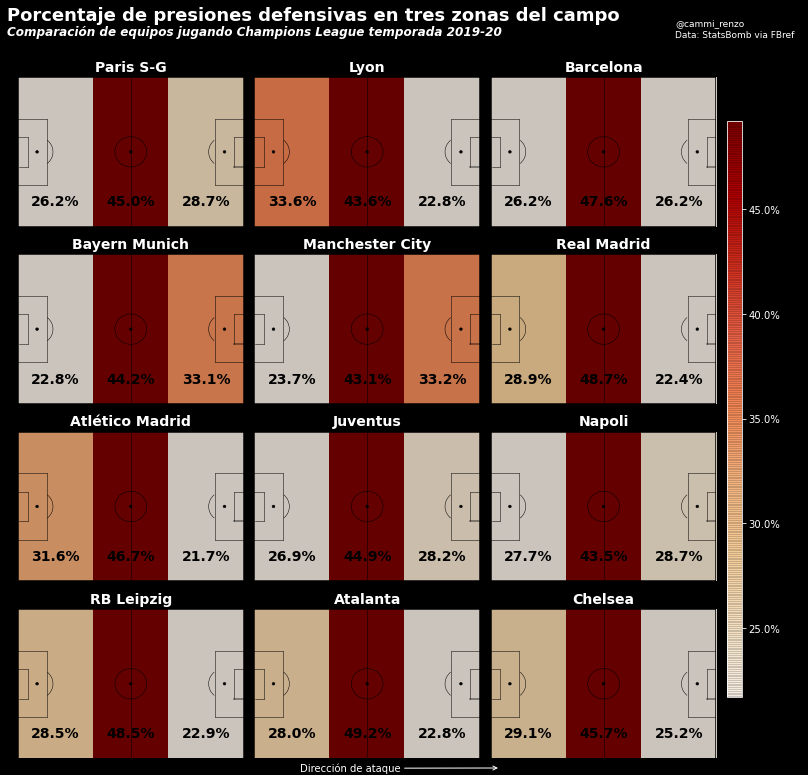

In [21]:
#for the pitch I used FCPython tutorial and adapted it for my means. Link: https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
#function variables are length, width and color of the pitch.

def press_viz(l,w,color):
    
    #set plot style
    plt.style.use('dark_background')
    
    #set font
    #plt.rcParams["font.family"] = "serif"

    #create figure
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
    axes_list = [item for sublist in axes for item in sublist]

    pressure_cols = ['z_1','z_2','z_3']

    group = df_champ.groupby(['Squad','z_1','z_2','z_3'])
    group_ordened = group['Total'].last().sort_values().index

    for squad_data in group_ordened:
        selection = group.get_group(squad_data)

        ax = axes_list.pop(0)

        #Pitch Outline & Centre Line
        ax.plot([0,0],[0,w], color=color)
        ax.plot([0,l],[w,w], color=color)
        ax.plot([l,l],[w,0], color=color)
        ax.plot([l,0],[0,0], color=color)
        ax.plot([l/2,l/2],[0,w], color=color, linewidth=0.5)

        #Left Penalty Area
        ax.plot([16.5,16.5],[l/2,25],color=color, linewidth=0.5)
        ax.plot([0,16.5],[l/2,l/2],color=color, linewidth=0.5)
        ax.plot([16.5,0],[25,25],color=color, linewidth=0.5)
        
        #Right Penalty Area
        ax.plot([l,113.5],[l/2,l/2],color=color, linewidth=0.5)
        ax.plot([113.5,113.5],[l/2,25],color=color, linewidth=0.5)
        ax.plot([113.5,l],[25,25],color=color, linewidth=0.5)
        
        #Left 6-yard Box
        ax.plot([0,5.5],[54,54],color=color, linewidth=0.5)
        ax.plot([5.5,5.5],[54,36],color=color, linewidth=0.5)
        ax.plot([5.5,0.5],[36,36],color=color, linewidth=0.5)
        
        #Right 6-yard Box
        ax.plot([l,124.5],[54,54],color=color, linewidth=0.5)
        ax.plot([124.5,124.5],[54,36],color=color, linewidth=0.5)
        ax.plot([124.5,l],[36,36],color=color, alpha=0.5)
        
        #Prepare Circles
        centreCircle = plt.Circle((l/2,w/2),9.15,color=color,fill=False, linewidth=0.5)
        centreSpot = plt.Circle((l/2,w/2),0.8,color=color, linewidth=0.5)
        leftPenSpot = plt.Circle((11,w/2),0.8,color=color, linewidth=0.5)
        rightPenSpot = plt.Circle((119,w/2),0.8,color=color, linewidth=0.5)
        
        #Draw Circles
        ax.add_patch(centreCircle)
        ax.add_patch(centreSpot)
        ax.add_patch(leftPenSpot)
        ax.add_patch(rightPenSpot)
        
        #Prepare Arcs
        leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=color, linewidth=0.5)
        rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=color, linewidth=0.5)

        #Draw Arcs
        ax.add_patch(leftArc)
        ax.add_patch(rightArc)
        
        #Delete Axes
        ax.axis('off')

        #COLOR
        colors = df_champ[pressure_cols].values
        normal = plt.Normalize(df_champ[pressure_cols].values.min(), df_champ[pressure_cols].values.max())
        cmap=plt.cm.OrRd
        c=cmap(colors)
        
        ax.imshow(selection[pressure_cols], zorder=0, aspect="auto", extent=(0,l,0,w), cmap=cmap, alpha=0.8)

        counter = 0
        for i in range(1,4):
            ax.annotate(str(squad_data[i]) + '%', xy=(counter + l/6, w/6), color='black', fontsize=14, ha='center', va='center', weight='bold')
            counter += l/3

        #Set titles
        ax.set_title(squad_data[0], fontsize=14, weight='bold')
     
    for ax in axes_list:
        ax.remove()

    #plot main titles
    plt.figtext(0,1.04,'Porcentaje de presiones defensivas en tres zonas del campo', fontsize=18, ha='left', weight='bold')
    plt.figtext(0,1.02, 'Comparación de equipos jugando Champions League temporada 2019-20', fontsize=12, fontstyle='italic', ha='left', weight='bold')

    #color bar
    fmt = cbar.ticker.PercentFormatter()

    cax = fig.add_axes([1,0.1,0.02,0.8]) #vertical
    #cax = fig.add_axes([0.1,-0.02,0.8,0.02]) #horizontal
    cb2 = cbar.ColorbarBase(cax, cmap=cmap,norm=normal, alpha=0.8, orientation='vertical', format=fmt) 

    #adjust subplots in the figure 
    plt.tight_layout()

    #plot direction of play
    plt.annotate('Dirección de ataque', xy=(500,7), xycoords='figure points', xytext=(300, 7/2), 
                arrowprops=dict(arrowstyle="->", color='white'))
    
    #plot credits
    ax.annotate('@cammi_renzo',
            xy=(675, 750), xycoords='figure points',
            fontsize=9)

    ax.annotate('Data: StatsBomb via FBref',
            xy=(675, 745), xycoords='figure points',
            horizontalalignment='left', verticalalignment='top',
            fontsize=9)

    #save figure
    plt.savefig('pres_3Z_v2.png', bbox_inches="tight")

    #Display Pitch
    plt.show()

press_champ = press_viz(l=130,w=90,color='black')
